## PIZZA SALES ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

### Import the Data

In [2]:
df=pd.read_csv(r"C:\Users\User\Downloads\PIZZA SALES\pizza_sales.csv")

### MetaData of Raw Data

In [3]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [5]:
print("The number of rows & columns of MetaData : ", df.shape)

The number of rows & columns of MetaData :  (48620, 12)


In [6]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


### Data Types in Raw Data

In [8]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pizza_id,48620.0,24310.500000,14035.529381,1.00,12155.75,24310.5,36465.25,48620.00
order_id,48620.0,10701.479761,6180.119770,1.00,5337.00,10682.5,16100.00,21350.00
quantity,48620.0,1.019622,0.143077,1.00,1.00,1.0,1.00,4.00
unit_price,48620.0,16.494132,3.621789,9.75,12.75,16.5,20.25,35.95
total_price,48620.0,16.821474,4.437398,9.75,12.75,16.5,20.50,83.00


### KPI's

In [27]:
total_revenue = df['total_price'].sum()
print(f"total revenue : {total_revenue:,.2f}")
total_pizza_sold=df['quantity'].sum()
print("total number of pizza sold : ",total_pizza_sold)
total_orders=df['order_id'].nunique()
print("total pizza orders : ",total_orders)
avg_order_value= total_revenue/total_orders
print(f"average orders value : {avg_order_value:,.2f}")
avg_order=total_pizza_sold/total_orders
print(f"average pizzas per order : {avg_order:,.2f}")

total revenue : 817,860.05
total number of pizza sold :  49574
total pizza orders :  21350
average orders value : 38.31
average pizzas per order : 2.32


### Chart's

##### Ingredient Analysis

In [39]:
ingredient = (
    df['pizza_ingredients']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
    .rename(columns={'count': 'Counts'})
)

print(ingredient.head(10))


   pizza_ingredients  Counts
0             Garlic   27422
1           Tomatoes   26601
2         Red Onions   19547
3        Red Peppers   16284
4  Mozzarella Cheese   10333
5          Pepperoni   10300
6            Spinach   10012
7          Mushrooms    9624
8            Chicken    8443
9          Capocollo    6572


#### Daily Trend -  Total Orders

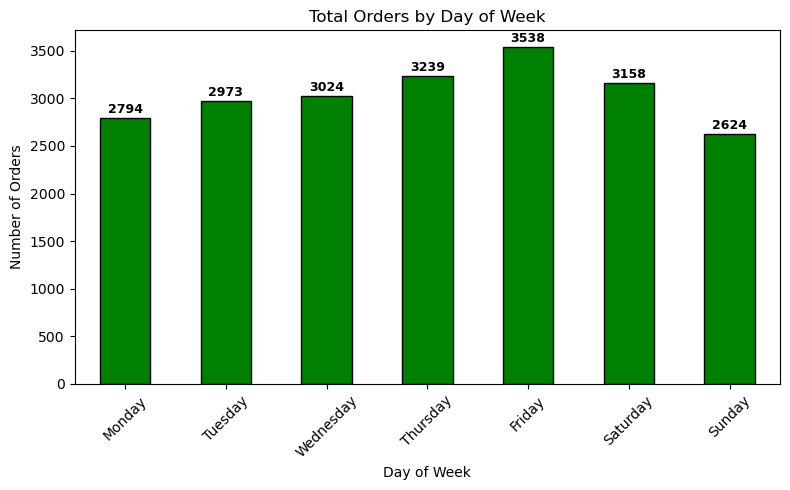

In [40]:
# Convert order_date column to datetime
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

# Extract day name from order_date
df['day_name'] = df['order_date'].dt.day_name()

# Define correct weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Set the day_name column as an ordered categorical type
df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

# Group by day_name and count unique order IDs
orders_by_day = df.groupby('day_name', observed=False)['order_id'].nunique()

# Plot the data
ax = orders_by_day.plot(kind='bar', figsize=(8, 5), color='green', edgecolor='black')

# Add labels and title
plt.title("Total Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

# Add values on bars
for i, val in enumerate(orders_by_day):
    plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


#### Daily Trend -  Total Revenue

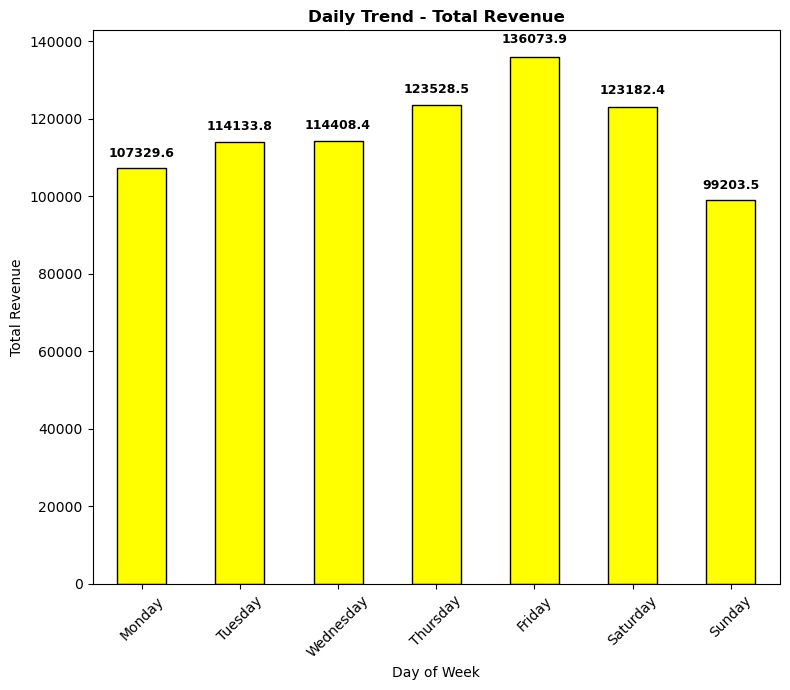

In [47]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

# Extract day name from order_date
df['day_name'] = df['order_date'].dt.day_name()

# Define weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Set the day_name column as an ordered category
df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

# Group by day name and calculate total revenue
orders_by_day = df.groupby('day_name', observed=False)['total_price'].sum()

# Plot the total revenue by day of week
ax = orders_by_day.plot(kind='bar', figsize=(8, 7), color='yellow', edgecolor='black')

# Add title and labels
plt.title("Daily Trend - Total Revenue", fontsize=12, fontweight='bold')
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, val in enumerate(orders_by_day):
    plt.text(i, val + (val * 0.02), f'{val:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


#### Daily Trend -  Total Quantity

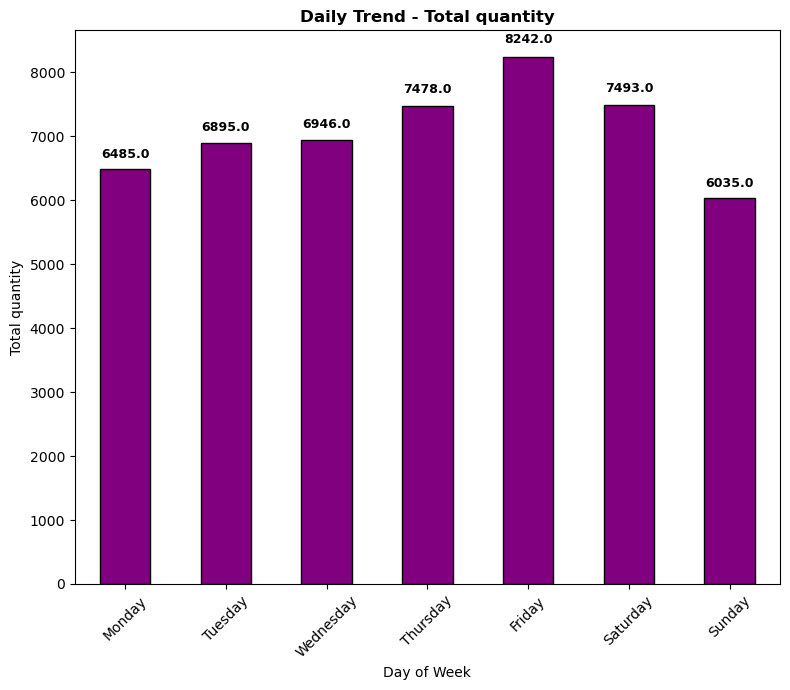

In [51]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

# Extract day name from order_date
df['day_name'] = df['order_date'].dt.day_name()

# Define weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Set the day_name column as an ordered category
df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

# Group by day name and calculate total revenue
orders_by_day = df.groupby('day_name', observed=False)['quantity'].sum()

# Plot the total revenue by day of week
ax = orders_by_day.plot(kind='bar', figsize=(8, 7), color='purple', edgecolor='black')

# Add title and labels
plt.title("Daily Trend - Total quantity", fontsize=12, fontweight='bold')
plt.xlabel("Day of Week")
plt.ylabel("Total quantity")
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, val in enumerate(orders_by_day):
    plt.text(i, val + (val * 0.02), f'{val:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


#### Hourly Trends - Total Orders

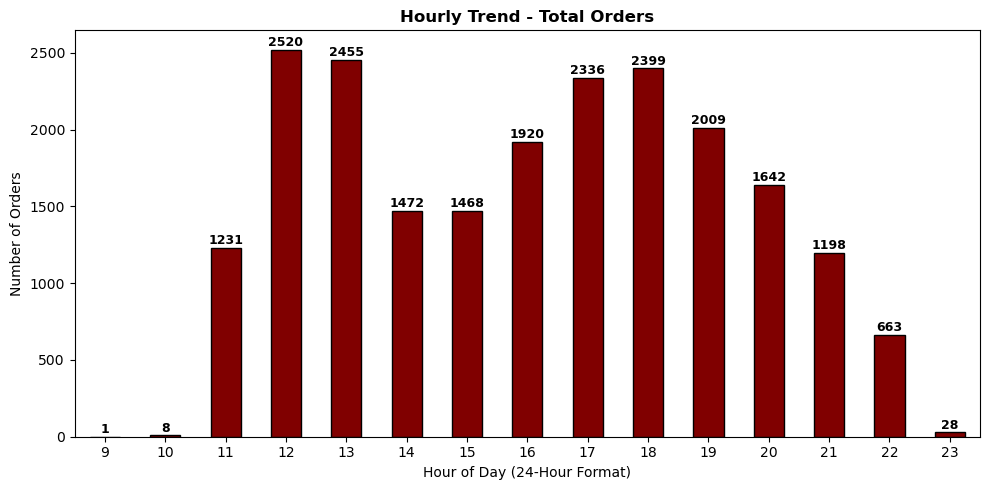

In [52]:
# Convert 'order_time' from text to datetime format
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

# Extract hour from 'order_time'
df['order_hour'] = df['order_time'].dt.hour

# Group by hour and count unique order IDs
orders_by_hour = df.groupby('order_hour', observed=False)['order_id'].nunique()

# Plot hourly order trend
ax = orders_by_hour.plot(kind='bar', figsize=(10, 5), color='maroon', edgecolor='black')

# Add title and labels
plt.title("Hourly Trend - Total Orders", fontsize=12, fontweight='bold')
plt.xlabel("Hour of Day (24-Hour Format)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

# Add value labels on bars
for i, val in enumerate(orders_by_hour):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


#### Hourly Trends - Total Revenue

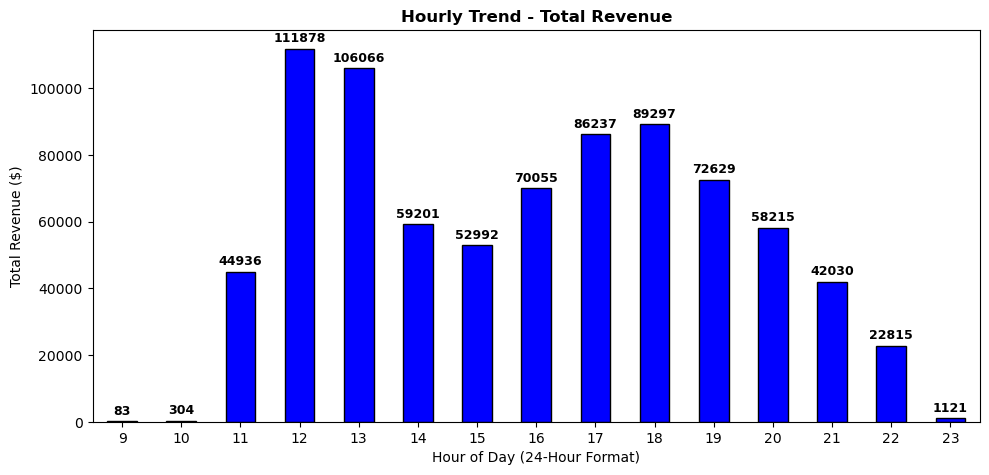

In [62]:
# Convert 'order_time' from text to datetime format
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

# Extract hour from 'order_time'
df['order_hour'] = df['order_time'].dt.hour

# Group by hour and calculate total revenue
orders_by_hour = df.groupby('order_hour', observed=False)['total_price'].sum()

# Plot hourly revenue trend
plt.figure(figsize=(10, 5))
ax = orders_by_hour.plot(kind='bar', color='blue', edgecolor='black')

# Add title and labels
plt.title("Hourly Trend - Total Revenue", fontsize=12, fontweight='bold')
plt.xlabel("Hour of Day (24-Hour Format)")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=0)

# Add value labels on top of bars
for i, val in enumerate(orders_by_hour):
    plt.text(i, val + (0.01 * max(orders_by_hour)),  # adaptive label spacing
             f"{val:.0f}", ha='center', va='bottom',
             fontsize=9, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


#### Hourly Trends - Total Quantity

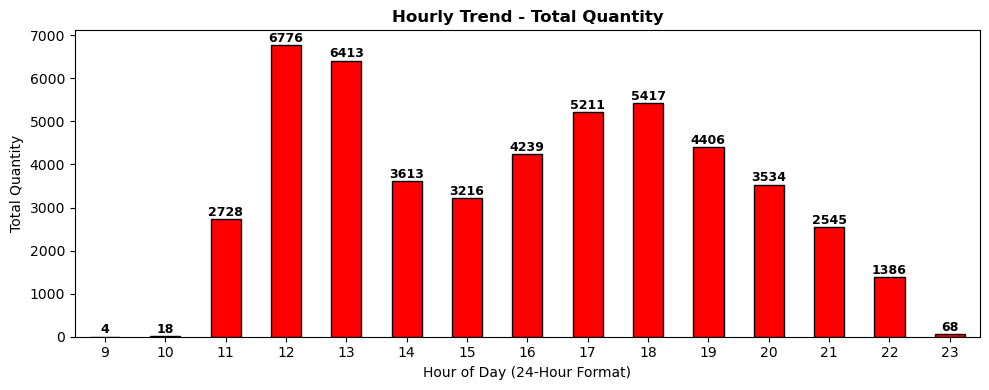

In [58]:
# Convert 'order_time' from text to datetime format
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

# Extract hour from 'order_time'
df['order_hour'] = df['order_time'].dt.hour

# Group by hour and count unique order IDs
orders_by_hour = df.groupby('order_hour', observed=False)['quantity'].sum()

# Plot hourly order trend
ax = orders_by_hour.plot(kind='bar', figsize=(10, 4), color='red', edgecolor='black')

# Add title and labels
plt.title("Hourly Trend - Total Quantity", fontsize=12, fontweight='bold')
plt.xlabel("Hour of Day (24-Hour Format)")
plt.ylabel("Total Quantity")
plt.xticks(rotation=0)

# Add value labels on bars
for i, val in enumerate(orders_by_hour):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


#### Monthly Trends - Total Orders

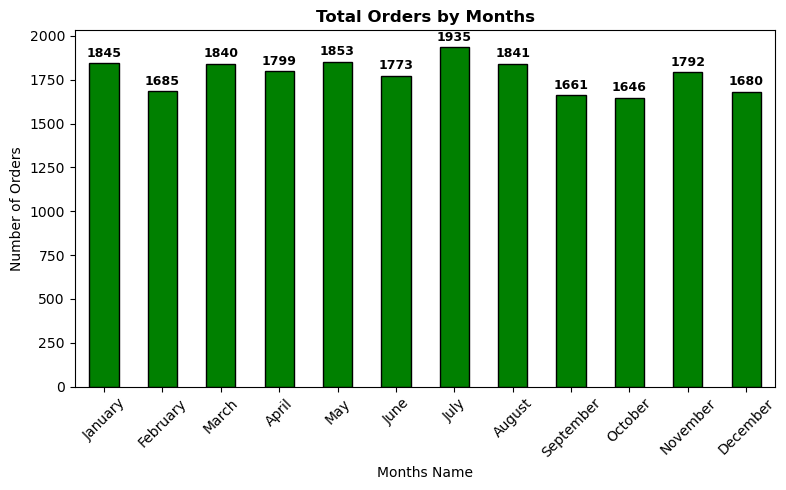

In [68]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst= True)
df['month_name']=df['order_date'].dt.month_name()
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
df['month_name']=pd.Categorical(df['month_name'],categories=month_order,ordered=True)
order_by_month=df.groupby('month_name',observed=False)['order_id'].nunique()
ax = order_by_month.plot(kind='bar', figsize=(8, 5), color='green', edgecolor='black')

# Add labels and title
plt.title("Total Orders by Months",fontsize=12,fontweight='bold')
plt.xlabel("Months Name")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

# Add values on bars
for i, val in enumerate(order_by_month):
    plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### Monthly Trends - Total Revenue

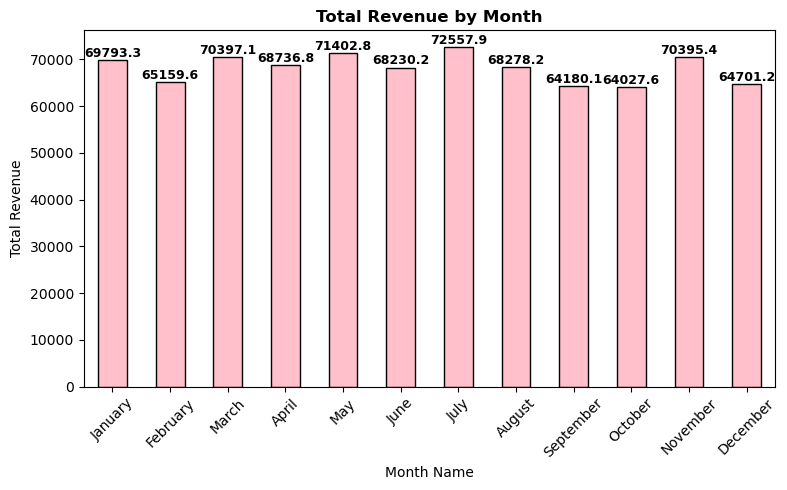

In [71]:
# Convert order_date from text to datetime
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

# Extract month name
df['month_name'] = df['order_date'].dt.month_name()

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Make month_name a categorical variable with correct order
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Group by month and count unique order IDs
order_by_month = df.groupby('month_name', observed=False)['total_price'].sum()

# Plot monthly trend
ax = order_by_month.plot(kind='bar', figsize=(8, 5), color='pink', edgecolor='black')

# Add labels and title
plt.title("Total Revenue by Month", fontsize=12, fontweight='bold')
plt.xlabel("Month Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

# Add value labels on bars
for i, val in enumerate(order_by_month):
    plt.text(i, val + 20, f'{val:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


#### Monthly Trends - Total Quantity

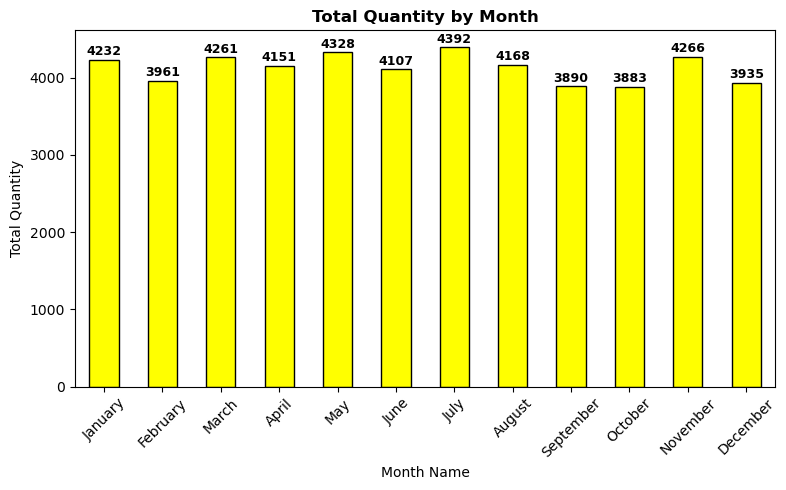

In [72]:
# Convert order_date from text to datetime
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

# Extract month name
df['month_name'] = df['order_date'].dt.month_name()

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Make month_name a categorical variable with correct order
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Group by month and count unique order IDs
order_by_month = df.groupby('month_name', observed=False)['quantity'].sum()

# Plot monthly trend
ax = order_by_month.plot(kind='bar', figsize=(8, 5), color='yellow', edgecolor='black')

# Add labels and title
plt.title("Total Quantity by Month", fontsize=12, fontweight='bold')
plt.xlabel("Month Name")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)

# Add value labels on bars
for i, val in enumerate(order_by_month):
    plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


#### % of Sales By Pizza Categories

In [75]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'day_name',
       'order_hour', 'month_name'],
      dtype='object')

In [76]:
df['pizza_category'].value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

In [83]:
category_sales=df.groupby('pizza_category')['total_price'].sum()
cat_percentage= category_sales/ category_sales.sum() *100
cat_percentage


pizza_category
Chicken    23.955138
Classic    26.905960
Supreme    25.456311
Veggie     23.682591
Name: total_price, dtype: float64

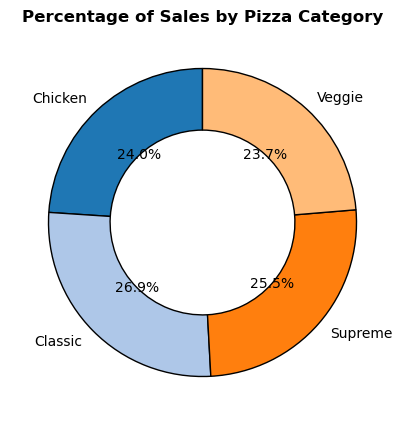

In [84]:
# Calculate category-wise sales percentage
category_sales = df.groupby('pizza_category')['total_price'].sum()
cat_percentage = category_sales / category_sales.sum() * 100

# Plot pie chart
plt.figure(figsize=(5, 5))
colors = plt.get_cmap('tab20').colors

plt.pie(
    cat_percentage,
    labels=cat_percentage.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'width': 0.4}
)

# Add title
plt.title("Percentage of Sales by Pizza Category", fontsize=12, fontweight='bold')
plt.show()


#### % Sales by Pizza Size & Category

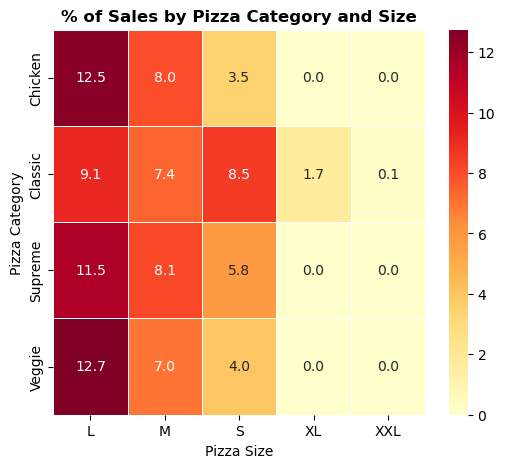

In [89]:
# Create a pivot table: total sales by category and size
sales_pivot = df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)

# Convert to percentage
sales_pct = sales_pivot / sales_pivot.sum().sum() * 100

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(sales_pct, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=0.5)

plt.title('% of Sales by Pizza Category and Size', fontsize=12, fontweight='bold')
plt.xlabel('Pizza Size')
plt.ylabel('Pizza Category')
plt.show()


#### Total Pizza Sold by Pizza Category

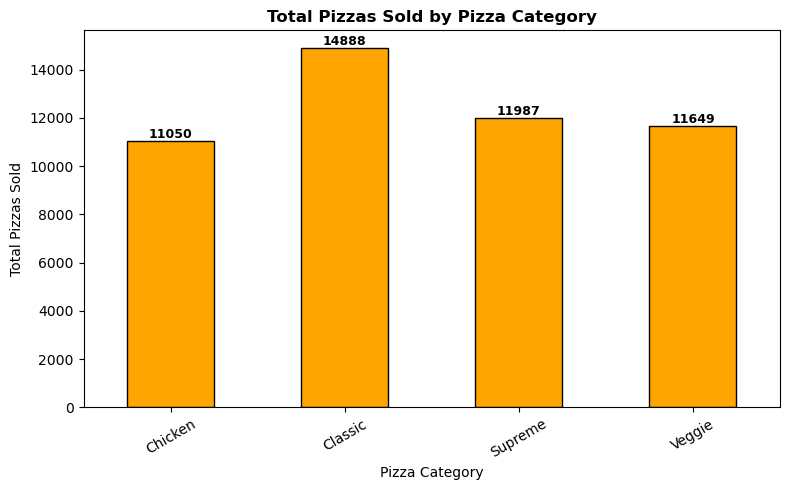

In [93]:
# Group by pizza category and count total pizzas sold
category_sales = df.groupby('pizza_category', observed=False)['quantity'].sum()

# Plot column chart
plt.figure(figsize=(8, 5))
ax = category_sales.plot(kind='bar', color='orange', edgecolor='black')

# Add title and labels
plt.title("Total Pizzas Sold by Pizza Category", fontsize=12, fontweight='bold')
plt.xlabel("Pizza Category")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=30)

# Add values on bars
for i, val in enumerate(category_sales):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


#### Top 5 Best-Selling Pizzas 

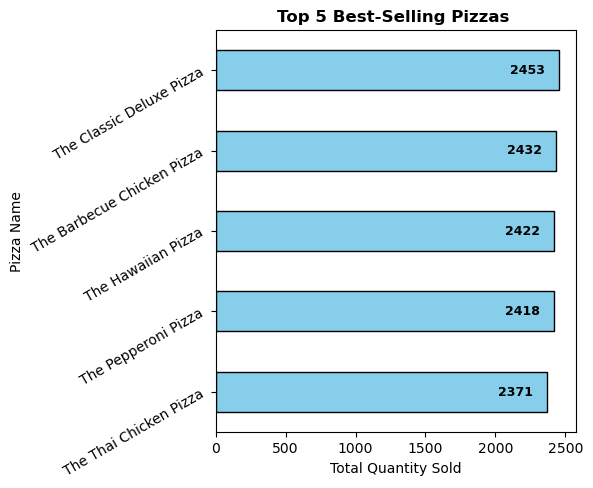

In [103]:
# Group by pizza name and count total quantity sold
top5_pizzas = (
    df.groupby('pizza_name', observed=False)['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Plot horizontal bar chart
plt.figure(figsize=(6, 5))
ax = top5_pizzas.plot(kind='barh', color='skyblue', edgecolor='black')

# Add title and labels
plt.title("Top 5 Best-Selling Pizzas ", fontsize=12, fontweight='bold')
plt.xlabel("Total Quantity Sold")
plt.ylabel("Pizza Name")
plt.yticks(rotation=30)
# Add value labels on bars
for i, val in enumerate(top5_pizzas):
    plt.text(val - 350, i, str(val), va='center', fontsize=9, fontweight='bold')

# Invert y-axis to show the highest value on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


#### Top 5 Best Selling Pizzas - Total Orders

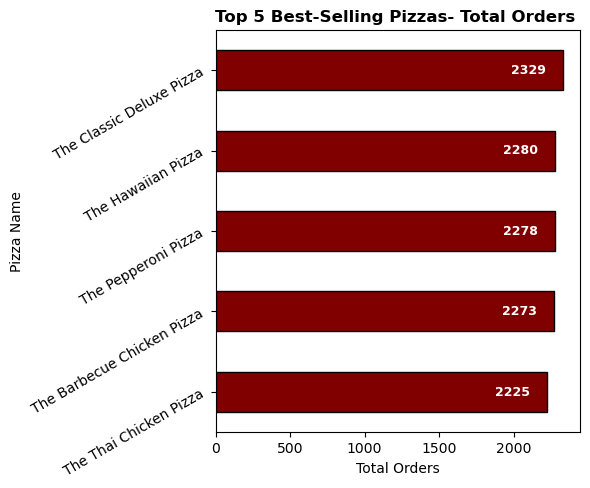

In [115]:
# Group by pizza name and count total orders
top5_pizzas = (
    df.groupby('pizza_name', observed=False)['order_id']
    .nunique()
    .sort_values(ascending=False)
    .head(5)
)

# Plot horizontal bar chart
plt.figure(figsize=(6, 5))
ax = top5_pizzas.plot(kind='barh', color='maroon', edgecolor='black')

# Add title and labels
plt.title("Top 5 Best-Selling Pizzas- Total Orders ", fontsize=12, fontweight='bold')
plt.xlabel("Total Orders")
plt.ylabel("Pizza Name")
plt.yticks(rotation=30)
# Add value labels on bars
for i, val in enumerate(top5_pizzas):
    plt.text(val - 350, i, str(val), va='center', fontsize=9, fontweight='bold', color='white')

# Invert y-axis to show the highest value on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


#### Top 5 Best Selling Pizzas - Total Sales

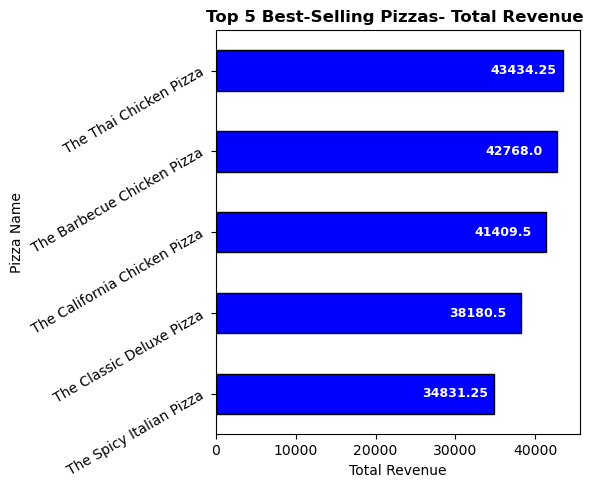

In [124]:
# Group by pizza name and count total sales
top5_pizzas = (
    df.groupby('pizza_name', observed=False)['total_price']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Plot horizontal bar chart
plt.figure(figsize=(6, 5))
ax = top5_pizzas.plot(kind='barh', color='blue', edgecolor='black')

# Add title and labels
plt.title("Top 5 Best-Selling Pizzas- Total Revenue ", fontsize=12, fontweight='bold')
plt.xlabel("Total Revenue")
plt.ylabel("Pizza Name")
plt.yticks(rotation=30)
# Add value labels on bars
for i, val in enumerate(top5_pizzas):
    plt.text(val - 9000, i, str(val), va='center', fontsize=9, fontweight='bold', color='white')

# Invert y-axis to show the highest value on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


#### Bottom 5 worst-Selling Pizzas

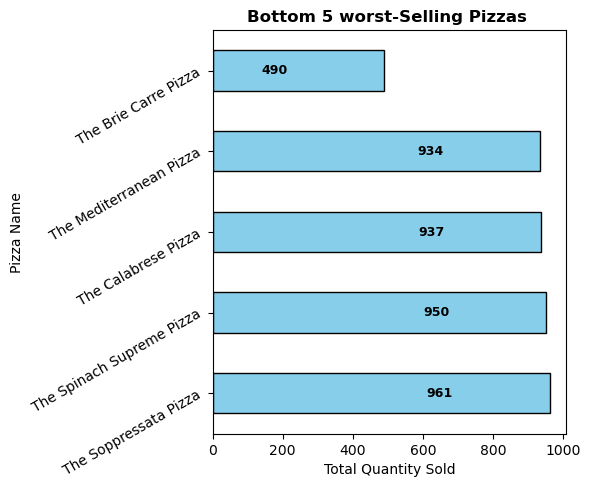

In [126]:
# Group by pizza name and count total quantity sold
top5_pizzas = (
    df.groupby('pizza_name', observed=False)['quantity']
    .sum()
    .sort_values(ascending=True)
    .head(5)
)

# Plot horizontal bar chart
plt.figure(figsize=(6, 5))
ax = top5_pizzas.plot(kind='barh', color='skyblue', edgecolor='black')

# Add title and labels
plt.title("Bottom 5 worst-Selling Pizzas ", fontsize=12, fontweight='bold')
plt.xlabel("Total Quantity Sold")
plt.ylabel("Pizza Name")
plt.yticks(rotation=30)
# Add value labels on bars
for i, val in enumerate(top5_pizzas):
    plt.text(val - 350, i, str(val), va='center', fontsize=9, fontweight='bold')

# Invert y-axis to show the highest value on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


#### Bottom 5 worst Selling Pizzas - Total Orders

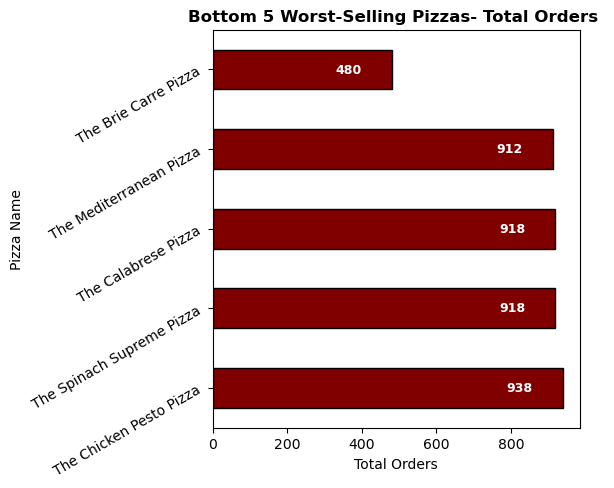

In [130]:
# Group by pizza name and count total orders
top5_pizzas = (
    df.groupby('pizza_name', observed=False)['order_id']
    .nunique()
    .sort_values(ascending=True)
    .head(5)
)

# Plot horizontal bar chart
plt.figure(figsize=(6, 5))
ax = top5_pizzas.plot(kind='barh', color='maroon', edgecolor='black')

# Add title and labels
plt.title("Bottom 5 Worst-Selling Pizzas- Total Orders ", fontsize=12, fontweight='bold')
plt.xlabel("Total Orders")
plt.ylabel("Pizza Name")
plt.yticks(rotation=30)
# Add value labels on bars
for i, val in enumerate(top5_pizzas):
    plt.text(val - 150, i, str(val), va='center', fontsize=9, fontweight='bold', color='white')

# Invert y-axis to show the highest value on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

### Bottom 5 Worst Selling Pizzas - Total Sales

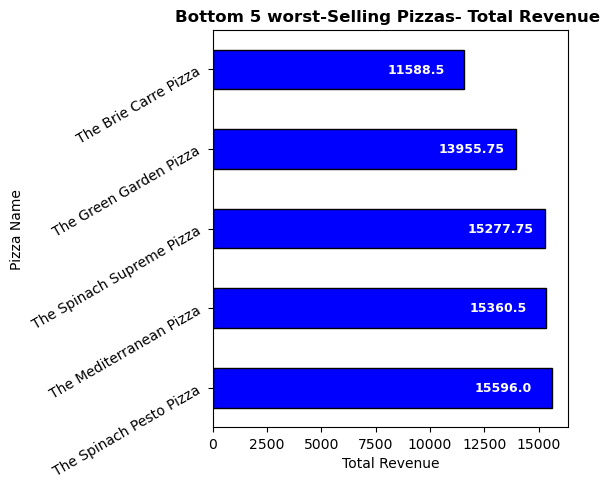

In [135]:
# Group by pizza name and count total sales
top5_pizzas = (
    df.groupby('pizza_name', observed=False)['total_price']
    .sum()
    .sort_values(ascending=True)
    .head(5)
)

# Plot horizontal bar chart
plt.figure(figsize=(6, 5))
ax = top5_pizzas.plot(kind='barh', color='blue', edgecolor='black')

# Add title and labels
plt.title("Bottom 5 worst-Selling Pizzas- Total Revenue ", fontsize=12, fontweight='bold')
plt.xlabel("Total Revenue")
plt.ylabel("Pizza Name")
plt.yticks(rotation=30)
# Add value labels on bars
for i, val in enumerate(top5_pizzas):
    plt.text(val - 3550, i, str(val), va='center', fontsize=9, fontweight='bold', color='white')

# Invert y-axis to show the highest value on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()